In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import date
import requests
from io import BytesIO
from utils import tsplot

from pandas.tools.plotting import lag_plot, autocorrelation_plot, bootstrap_plot

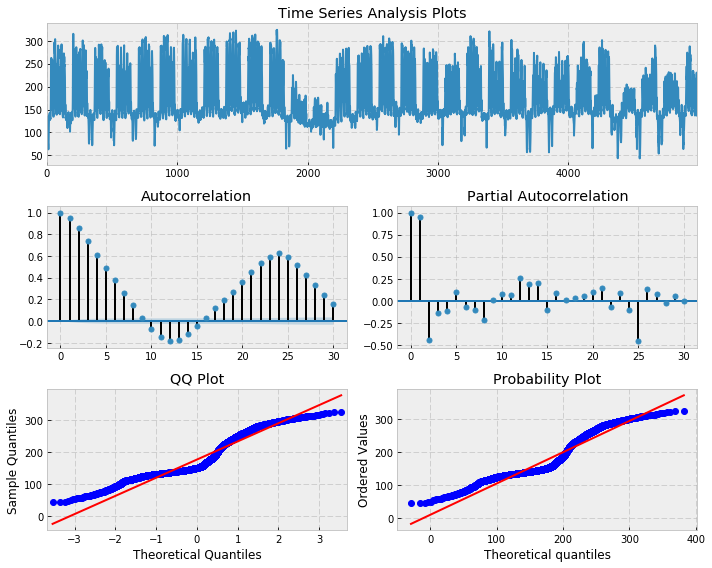

In [2]:
f = open('m.csv', 'rb').read()
data = f.decode().split('\n')
del data[-1]

serie_complete = pd.Series(data, dtype='float')
tsplot(serie_complete, lags=30)

In [10]:
start = date(2014,10,5)
start_winter_holidays = date(2014,12,20)
end_winter_holidays = date(2015,1,5)
start_easter_holidays = date(2015,4,4)
end_easter_holidays = date(2015,4,12)
end = date(2015,4,30)

start_w_holidays_index = (start_winter_holidays - start).days * 24
end_w_holidays_index = (end_winter_holidays - start).days * 24
start_e_holidays_index = (start_easter_holidays - start).days * 24
end_e_holidays_index = (end_easter_holidays - start).days * 24

serie_sem1 = pd.Series(data[:start_w_holidays_index], dtype='float')
serie_whol = pd.Series(data[start_w_holidays_index:end_w_holidays_index], dtype='float')
serie_sem2_1 = pd.Series(data[end_w_holidays_index:start_e_holidays_index], dtype='float')
serie_ehol = pd.Series(data[start_e_holidays_index:end_e_holidays_index], dtype='float')
serie_sem2_2 = pd.Series(data[end_e_holidays_index:], dtype='float')

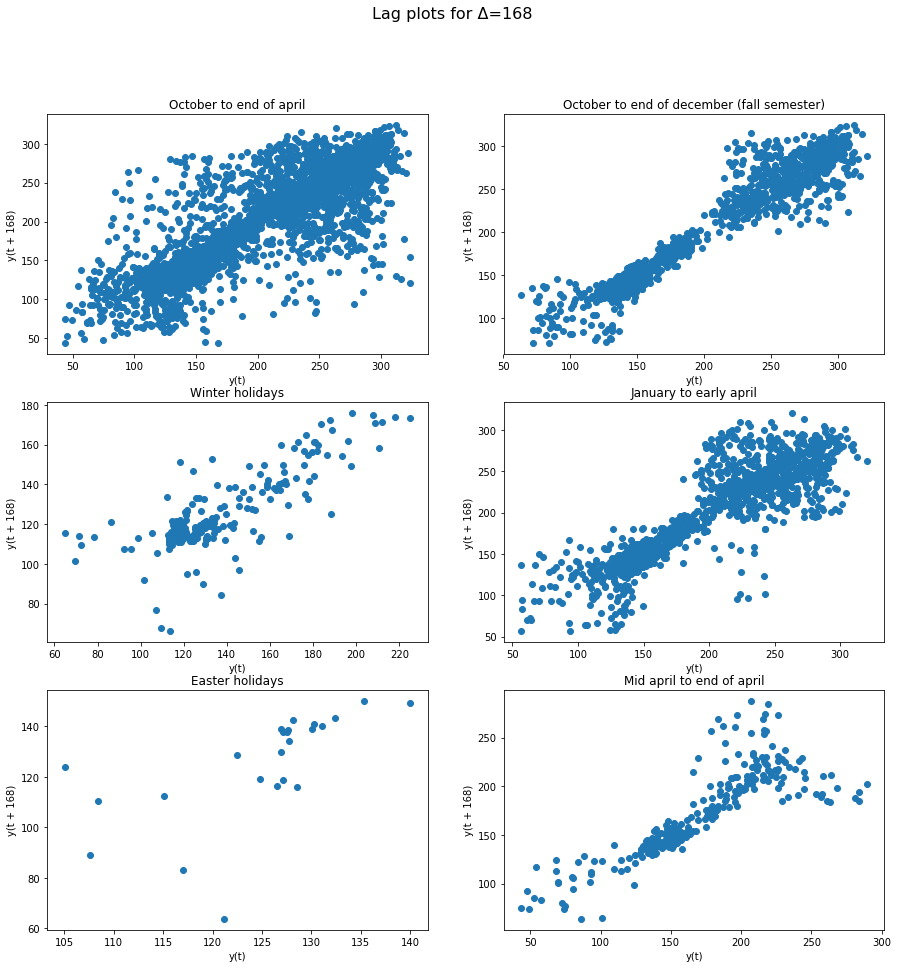

In [20]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle("Lag plots for Δ=168", fontsize=16)


ax1 = plt.subplot2grid((3,2), (0,0))
ax1.set_title("October to end of april (whole serie)")
ax2 = plt.subplot2grid((3,2), (0,1))
ax2.set_title("October to end of december (fall semester)")
ax3 = plt.subplot2grid((3,2), (1,0))
ax3.set_title("Winter holidays")
ax4 = plt.subplot2grid((3,2), (1,1))
ax4.set_title("January to early april")
ax5 = plt.subplot2grid((3,2), (2,0))
ax5.set_title("Easter holidays")
ax6 = plt.subplot2grid((3,2), (2,1))
ax6.set_title("Mid april to end of april")
lag_plot(serie_complete, lag=168, ax=ax1)
lag_plot(serie_sem1, lag=168, ax=ax2)
lag_plot(serie_whol, lag=168, ax=ax3)
lag_plot(serie_sem2_1, lag=168, ax=ax4)
lag_plot(serie_ehol, lag=168, ax=ax5)
lag_plot(serie_sem2_2, lag=168, ax=ax6)


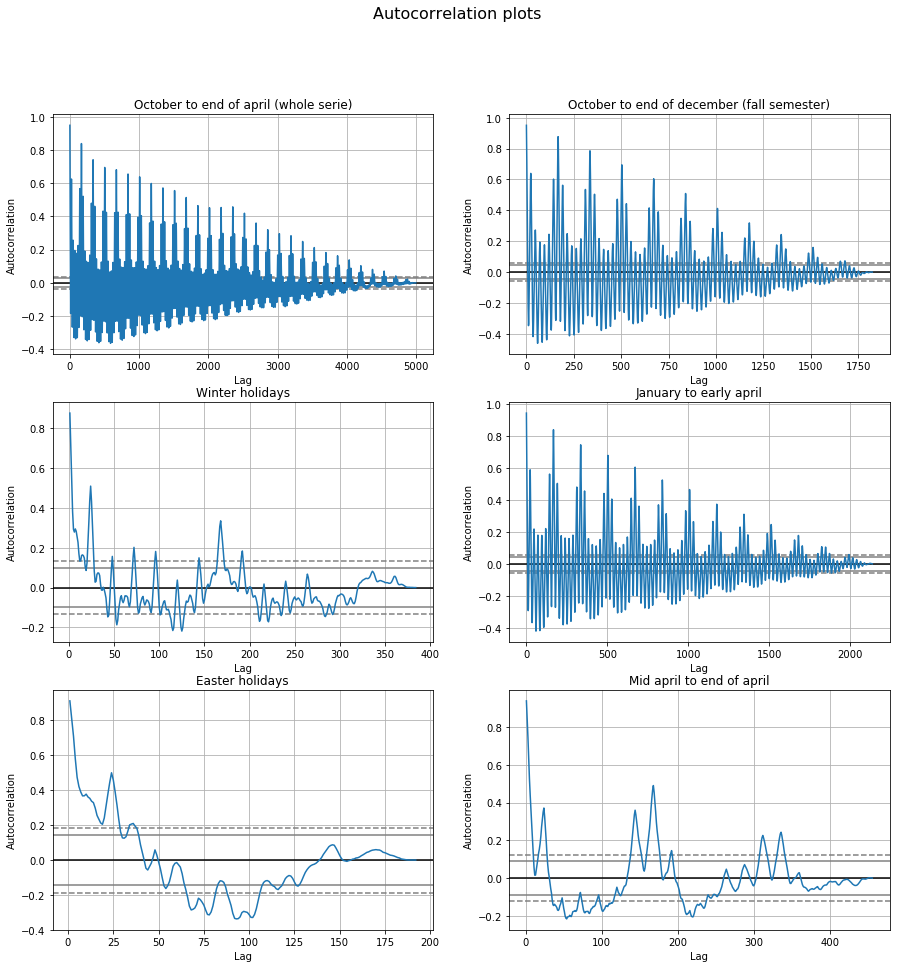

In [22]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle("Autocorrelation plots", fontsize=16)

ax1 = plt.subplot2grid((3,2), (0,0))
ax1.set_title("October to end of april (whole serie)")
ax2 = plt.subplot2grid((3,2), (0,1))
ax2.set_title("October to end of december (fall semester)")
ax3 = plt.subplot2grid((3,2), (1,0))
ax3.set_title("Winter holidays")
ax4 = plt.subplot2grid((3,2), (1,1))
ax4.set_title("January to early april")
ax5 = plt.subplot2grid((3,2), (2,0))
ax5.set_title("Easter holidays")
ax6 = plt.subplot2grid((3,2), (2,1))
ax6.set_title("Mid april to end of april")
autocorrelation_plot(serie_complete, ax=ax1)
autocorrelation_plot(serie_sem1, ax=ax2)
autocorrelation_plot(serie_whol, ax=ax3)
autocorrelation_plot(serie_sem2_1, ax=ax4)
autocorrelation_plot(serie_ehol, ax=ax5)
autocorrelation_plot(serie_sem2_2, ax=ax6)

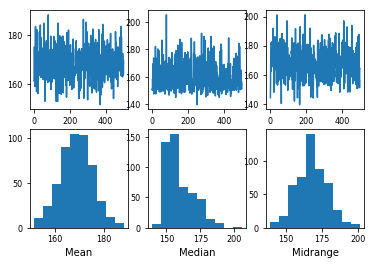

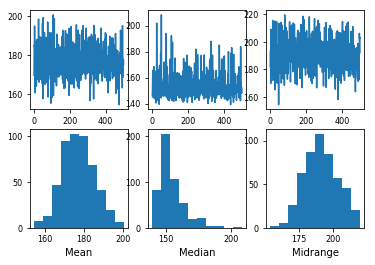

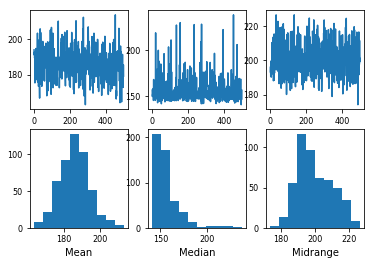

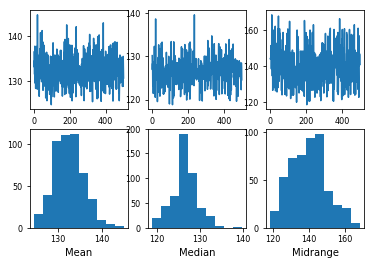

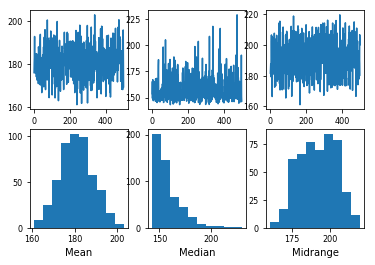

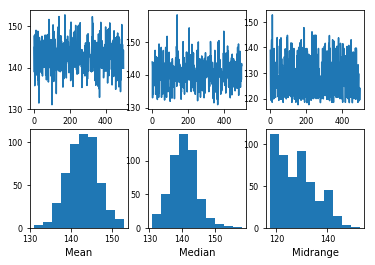

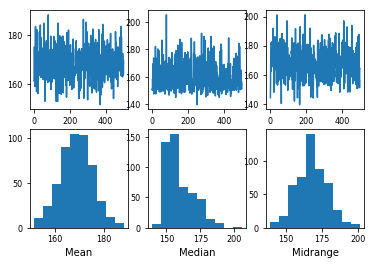

In [6]:
fig = plt.figure(figsize=(15, 15))

bootstrap_plot(serie_complete)
bootstrap_plot(serie_sem1)
bootstrap_plot(serie_whol)
bootstrap_plot(serie_sem2_1)
bootstrap_plot(serie_ehol)
bootstrap_plot(serie_sem2_2)